В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

In [2]:
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [3]:
X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values

In [4]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X_with_intercept

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

In [5]:
X_with_intercept.shape

(1064, 2)

# МНК

In [6]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [7]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [8]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [9]:
predictions_MNK[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 array([ 1725.5523 ,  4449.462  , 21984.47061]))

In [10]:
rmse_mnk = root_mean_squared_error(y, predictions_MNK)
rmse_mnk

4662.505766636395

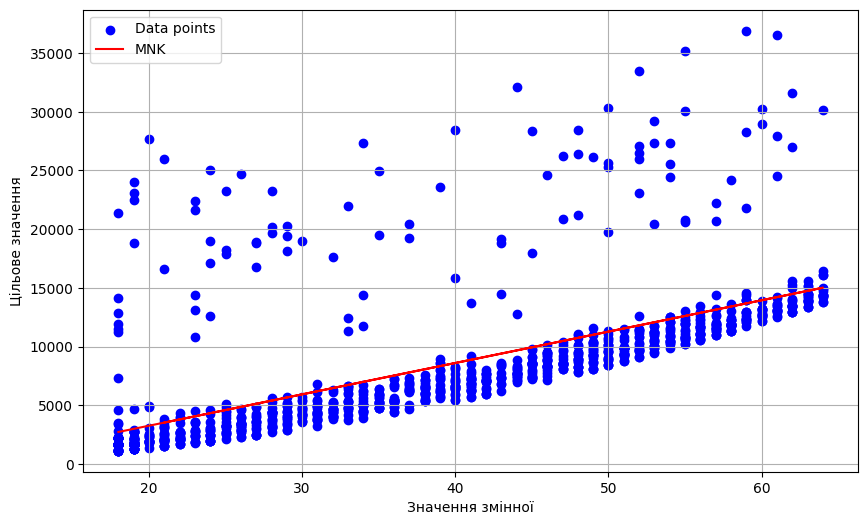

In [11]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

# Градієнтний спуск

In [12]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:,1] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:,1])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [13]:
m, b, errors = full_batch_gradient_descent(X_with_intercept, y, lr=0.000001, epochs=1000)
predictions_fbgd = m * X_with_intercept[:,1] + b

m, b

(np.float64(213.45756906581036), np.float64(4.331249162394349))

In [14]:
root_mean_squared_error(y, predictions_fbgd)

4723.647721473958

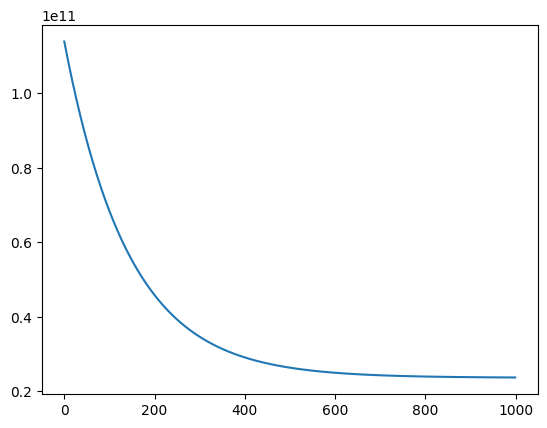

In [15]:
plt.plot(range(1000),errors)

In [16]:
m, b, errors = full_batch_gradient_descent(X_with_intercept, y, lr=0.0001, epochs=1000)
predictions_fbgd = m * X_with_intercept[:,1] + b

print("m:",m,"b:", b)

rmse_fbgd = root_mean_squared_error(y, predictions_fbgd)
rmse_fbgd


m: 221.1045843794301 b: -41.98126853149977


4713.250582815521

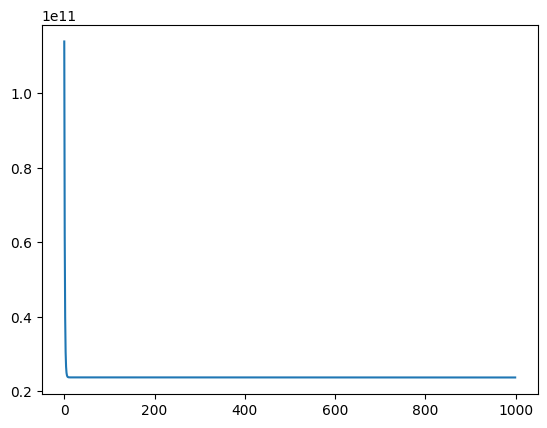

In [17]:
plt.plot(range(1000),errors)

In [18]:
m, b, errors = full_batch_gradient_descent(X_with_intercept, y, lr=0.00001, epochs=1000)
predictions_fbgd = m * X_with_intercept[:,1] + b

print("m:",m,"b:", b)

rmse_fbgd = root_mean_squared_error(y, predictions_fbgd)
rmse_fbgd

m: 220.15455551129122 b: 0.2130065279986346


4715.349750127827

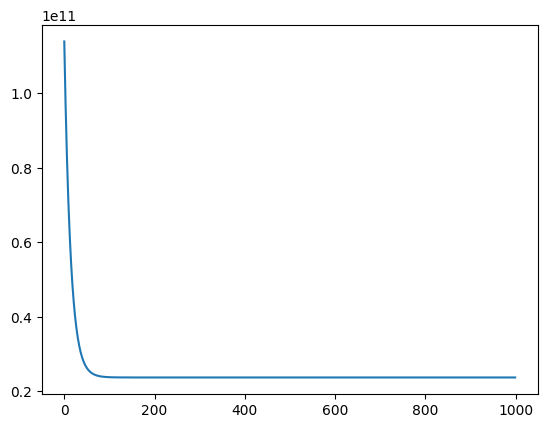

In [19]:
plt.plot(range(1000),errors)

# scikit

In [20]:
from sklearn.linear_model import LinearRegression

In [42]:
X = X.reshape(-1,1)

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [45]:
predictions_sklearn = lin_reg.predict(X)

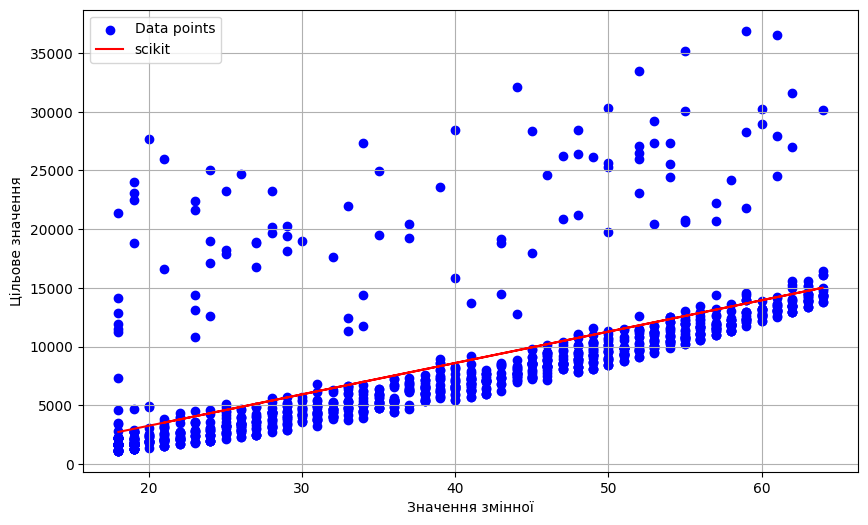

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_sklearn, color='red', label='scikit')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

# Plot all

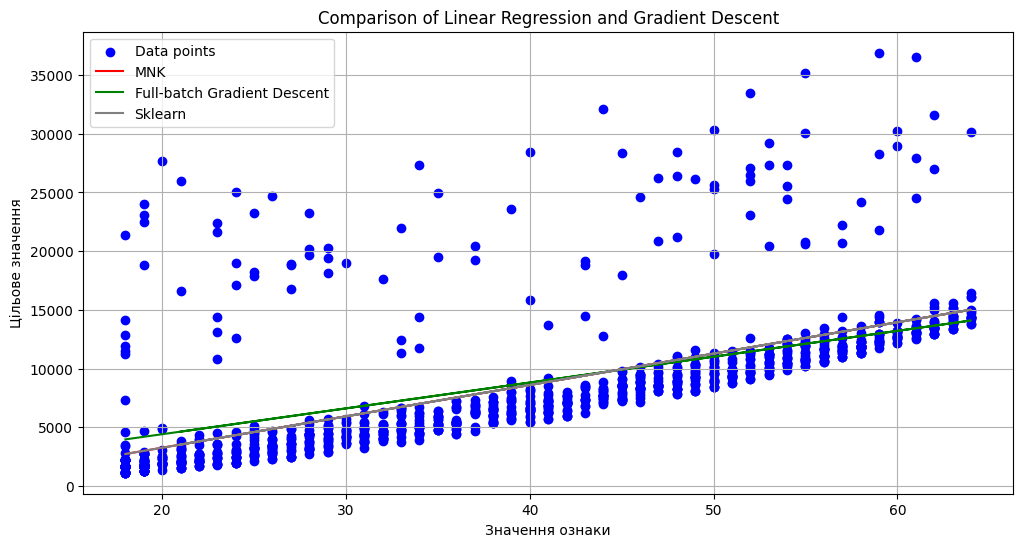

In [47]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X, predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X, predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з град. спуску: ', b, m)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з град. спуску:  0.2130065279986346 220.15455551129122
Коефіцієнти з sklearn:  -2091.4205565650864 [267.24891283]


In [49]:
print('RMSE МНК: ', rmse_mnk)
print('RMSE град. спуску: ', rmse_fbgd)
rmse_sklearn = root_mean_squared_error(y, predictions_sklearn)
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE град. спуску:  4715.349750127827
RMSE sklearn:  4662.505766636395


**Висновки**

МНК та scikit-learn.LinearRegression, по суті показали ті самі результати, що було очікувано оскільки scikit використовує МНК в своїй функції. Градієнтний спуск отримав інші значення, хоч і помилка не надто сильно відрізняється від інших двох - напевно треба ще побвитись з learning_rate та кількістю епох.




 # **Завдання 2.**

 Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [27]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [35]:
X_sm = smoker_df['age'].values
y_sm = smoker_df['charges'].values

In [36]:
X_sm

array([19, 62, 27, 30, 34, 31, 22, 28, 35, 60, 36, 48, 36, 58, 18, 53, 20,
       28, 27, 22, 37, 45, 57, 59, 64, 56, 38, 61, 20, 63, 29, 44, 19, 32,
       34, 30, 46, 42, 48, 18, 30, 42, 18, 63, 36, 27, 35, 19, 42, 40, 19,
       23, 63, 18, 63, 54, 50, 56, 19, 20, 52, 19, 46, 40, 50, 40, 54, 59,
       25, 19, 47, 31, 53, 43, 27, 34, 45, 64, 61, 52, 50, 19, 26, 23, 39,
       24, 27, 55, 44, 26, 36, 63, 64, 61, 40, 33, 56, 42, 30, 54, 61, 24,
       44, 21, 29, 51, 19, 39, 42, 57, 54, 49, 43, 35, 48, 31, 34, 21, 19,
       59, 30, 47, 49, 19, 37, 18, 44, 39, 42, 52, 64, 43, 40, 62, 44, 60,
       39, 27, 41, 51, 30, 29, 35, 37, 23, 29, 27, 53, 37, 47, 18, 33, 19,
       30, 50, 53, 27, 33, 18, 47, 33, 56, 36, 41, 23, 57, 60, 37, 46, 49,
       48, 25, 37, 51, 32, 57, 64, 47, 43, 60, 32, 18, 43, 45, 37, 25, 51,
       44, 34, 54, 43, 51, 29, 31, 24, 27, 30, 24, 47, 43, 22, 47, 19, 46,
       55, 18, 22, 45, 35, 20, 43, 22, 49, 47, 59, 37, 28, 39, 47, 22, 51,
       33, 38, 48, 25, 33

In [37]:
X_sm = X_sm.reshape(-1,1)
X_sm

array([[19],
       [62],
       [27],
       [30],
       [34],
       [31],
       [22],
       [28],
       [35],
       [60],
       [36],
       [48],
       [36],
       [58],
       [18],
       [53],
       [20],
       [28],
       [27],
       [22],
       [37],
       [45],
       [57],
       [59],
       [64],
       [56],
       [38],
       [61],
       [20],
       [63],
       [29],
       [44],
       [19],
       [32],
       [34],
       [30],
       [46],
       [42],
       [48],
       [18],
       [30],
       [42],
       [18],
       [63],
       [36],
       [27],
       [35],
       [19],
       [42],
       [40],
       [19],
       [23],
       [63],
       [18],
       [63],
       [54],
       [50],
       [56],
       [19],
       [20],
       [52],
       [19],
       [46],
       [40],
       [50],
       [40],
       [54],
       [59],
       [25],
       [19],
       [47],
       [31],
       [53],
       [43],
       [27],
       [34],
       [45],

In [38]:
lin_reg_smok = LinearRegression()
lin_reg_smok.fit(X_sm, y_sm)
lin_reg_smok.coef_, lin_reg_smok.intercept_

(array([305.23760211]), np.float64(20294.128126915966))

In [39]:
predictions_sklearn = lin_reg_smok.predict(X_sm)

In [41]:
root_mean_squared_error(X_sm,y_sm)

34019.898216634145

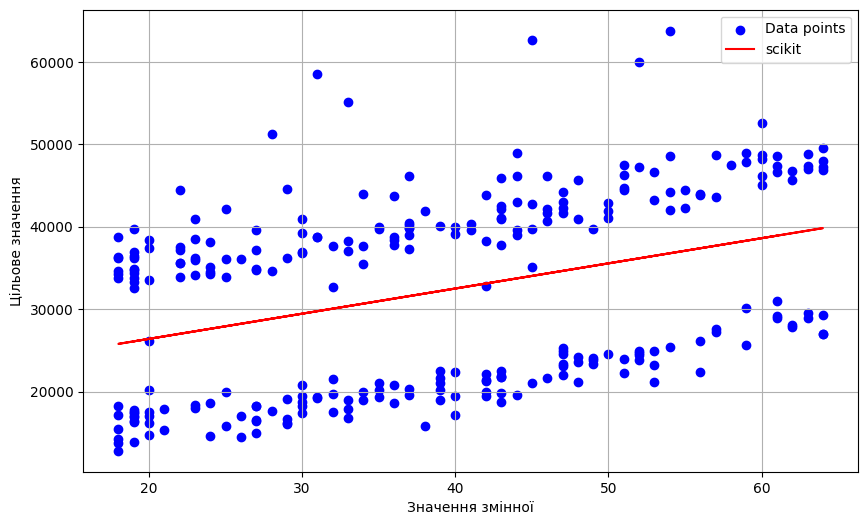

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(X_sm, y_sm, color='blue', label='Data points')
plt.plot(X_sm, predictions_sklearn, color='red', label='scikit')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

**Чи використовували б цю модель?**

Ні, тут дані розподілені явно не лінійно, і припасувати сюди лінійну регресію не є хорошим варіантом. Відповідно орієнтуватись на передбачення цієї моделі теж не добре.